In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('DatasetS/iris.csv')

In [4]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.size

900

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
df.shape

(150, 6)

In [16]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

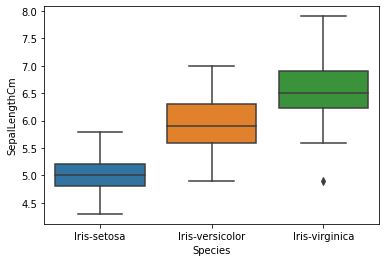

In [21]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

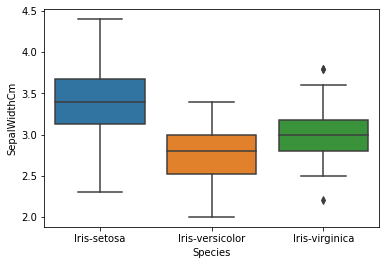

In [20]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

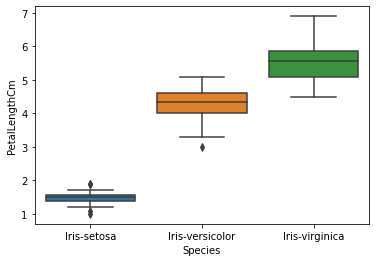

In [22]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

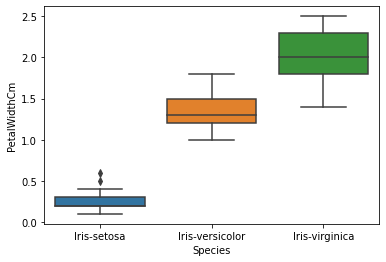

In [23]:
sns.boxplot(x='Species', y='PetalWidthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='count'>

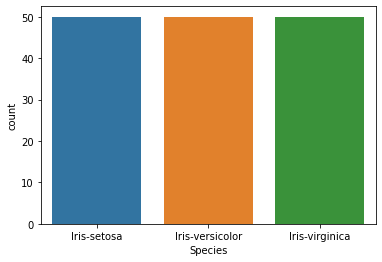

In [25]:
sns.countplot('Species',data=df)

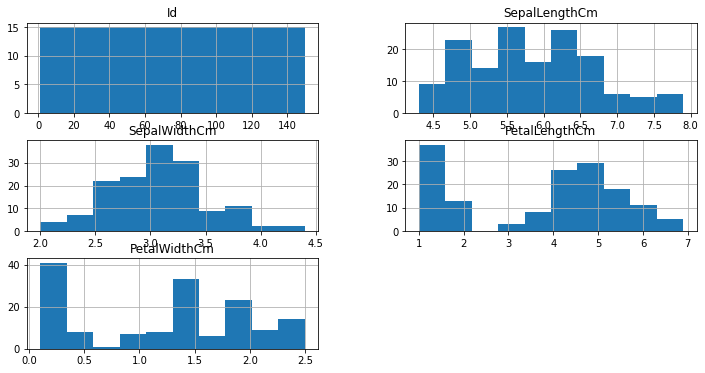

In [26]:
df.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df[features]
y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [31]:
Y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
from sklearn.metrics import accuracy_score, precision_score

In [36]:
cm

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]], dtype=int64)

In [37]:
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))

Accuracy :  1.0


In [38]:
tp_0 = cm[0,0]
tp_1 = cm[1,1]
tp_2 = cm[2,2]
print("True Positive ",tp_0)
print("True Positive ",tp_1)
print("True Positive ",tp_2)

True Positive  11
True Positive  9
True Positive  10


In [39]:
tn_0 = cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
tn_1 = cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]
tn_2 = cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('True Negative',tn_0)
print('True Negative',tn_1)
print('True Negative',tn_2)

True Negative 19
True Negative 21
True Negative 20


In [40]:
fp_0 = cm[1,0]+cm[2,0]
fp_1 = cm[0,1]+cm[2,1]
fp_2 = cm[0,2]+cm[1,2]
print('False positive',fp_0)
print('False positive',fp_1)
print('False positive',fp_2)

False positive 0
False positive 0
False positive 0


In [41]:
fn_0 = cm[0,1]+cm[0,2]
fn_1 = cm[1,0]+cm[1,2]
fn_2 = cm[2,0]+cm[2,1]
print('False negative',fn_0)
print('False negative',fn_1)
print('False negative',fn_2)

False negative 0
False negative 0
False negative 0


In [42]:
acc1 = (tp_0+tn_0)/(tp_0+tn_0+fn_0+fp_0)
acc2 = (tp_1+tn_1)/(tp_1+tn_1+fn_1+fp_1)
acc3 = (tp_2+tn_2)/(tp_2+tn_2+fn_2+fp_2)
acc = (acc1+acc2+acc3)/3
print("setosa : ", acc1)
print("versicolor : ", acc2)
print("virginica : ",acc3)
print("Accuracy : ",acc)

setosa :  1.0
versicolor :  1.0
virginica :  1.0
Accuracy :  1.0


In [43]:
r_0 = tp_0/(tp_0+fn_0)
r_1 = tp_1/(tp_1+fn_1)
r_2 = tp_2/(tp_2+fn_2)
r = (r_0+r_1+r_2)/3
print("setosa : ", r_0)
print("versicolor : ", r_1)
print("virginica : ",r_2)
print("Recall : ",r)

setosa :  1.0
versicolor :  1.0
virginica :  1.0
Recall :  1.0


In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

